In [1]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Step 1. Get the data from API and make a dataframe

In [2]:
df = pd.read_csv("data.csv", skipinitialspace=True)
print(df)

     genetic length   mass exercise  smoking alcohol sugar  lifespan
0       73.9    185   99.7      0.9      0.0     2.4   6.9      73.1
1       86.0    172  105.4      1.8      8.1     0.4   4.2      85.0
2       83.3    176  111.4      1.1      0.8     4.6   7.5      81.6
3       82.8    164  111.4      4.7     11.8     1.0   2.9      81.0
4       78.7    178   71.6      1.5      8.3     4.9   5.5      75.0
...      ...    ...    ...      ...      ...     ...   ...       ...
4091    80.3    176  115.9      3.7      0.1     5.6   5.8      80.7
4092    75.3    162  129.6      3.6      6.2     5.6   7.6      71.1
4093    93.1    189  115.3      2.7      9.4     4.9   6.6      90.0
4094    77.9    170   90.8      2.3     13.2     0.8   6.2      75.9
4095   101.3    188  129.2      1.2      8.2     6.0   6.2      96.9

[4096 rows x 8 columns]


In [3]:
df['genetic'] = pd.to_numeric(df['genetic'], errors='coerce')
df['length'] = pd.to_numeric(df['length'], errors='coerce')
df['mass'] = pd.to_numeric(df['mass'], errors='coerce')
df['exercise'] = pd.to_numeric(df['exercise'], errors='coerce')
df['alcohol'] = pd.to_numeric(df['alcohol'], errors='coerce')
df['sugar'] = pd.to_numeric(df['sugar'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4095 non-null   float64
 1   length    4093 non-null   float64
 2   mass      4094 non-null   float64
 3   exercise  4095 non-null   float64
 4   smoking   4096 non-null   float64
 5   alcohol   4094 non-null   float64
 6   sugar     4095 non-null   float64
 7   lifespan  4096 non-null   float64
dtypes: float64(8)
memory usage: 256.1 KB


Step 2. Check the missing data and decide what to keep

In [4]:
df= df[['genetic','length','mass','exercise','smoking','alcohol','sugar','lifespan']]
df.dropna(inplace=True)
print(df)

      genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
0        73.9   185.0   99.7       0.9      0.0      2.4    6.9      73.1
1        86.0   172.0  105.4       1.8      8.1      0.4    4.2      85.0
2        83.3   176.0  111.4       1.1      0.8      4.6    7.5      81.6
3        82.8   164.0  111.4       4.7     11.8      1.0    2.9      81.0
4        78.7   178.0   71.6       1.5      8.3      4.9    5.5      75.0
...       ...     ...    ...       ...      ...      ...    ...       ...
4091     80.3   176.0  115.9       3.7      0.1      5.6    5.8      80.7
4092     75.3   162.0  129.6       3.6      6.2      5.6    7.6      71.1
4093     93.1   189.0  115.3       2.7      9.4      4.9    6.6      90.0
4094     77.9   170.0   90.8       2.3     13.2      0.8    6.2      75.9
4095    101.3   188.0  129.2       1.2      8.2      6.0    6.2      96.9

[4086 rows x 8 columns]


Step 3. Define BMI and Exploratory Data Analysis 

In [7]:
#Define BMI
df['BMI'] = df['mass']/(df['length']/100)**2
display(df.head())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,29.130752
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,35.627366
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,35.963326
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,41.418798
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,22.598157


<AxesSubplot: xlabel='exercise'>

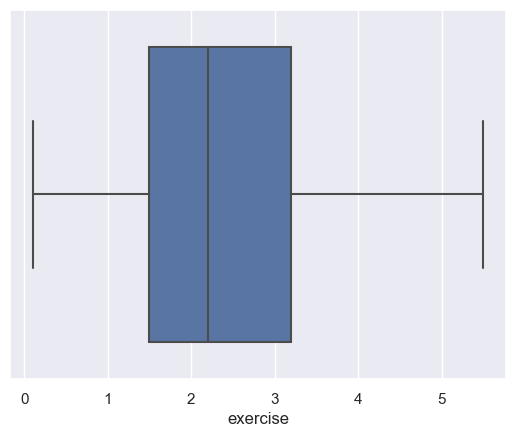

In [8]:
sns.boxplot(x=df['exercise'])

In [9]:
Q1=df['exercise'].quantile(0.25)
print("Q1:", Q1)

Q1: 1.5


In [10]:
Q3=df['exercise'].quantile(0.75)
print("Q3:", Q3)

Q3: 3.2


In [11]:
IQR=Q3-Q1
print("IQR: ", IQR)

IQR:  1.7000000000000002


In [12]:
lower_bound = Q1 - 1.5*IQR
print("Lower Bound:", lower_bound)

Lower Bound: -1.0500000000000003


In [13]:
upper_bound = Q3 + 1.5*IQR
print("Upper Bound:", upper_bound)

Upper Bound: 5.75


<AxesSubplot: xlabel='exercise'>

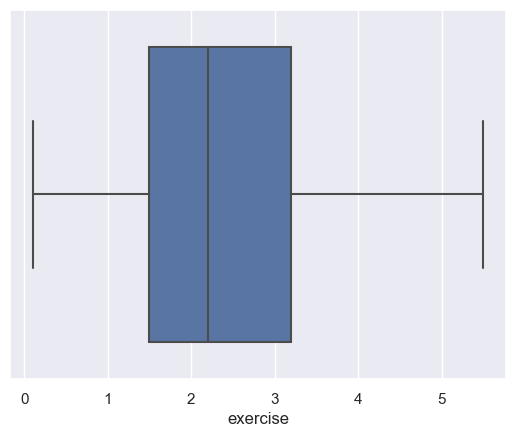

In [14]:
#clean up outliers using IQR
df_clean = df[(df['exercise']>lower_bound)&(df['exercise']<upper_bound)]
sns.boxplot(x = df_clean['exercise'])

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
X_train = df[['exercise','lifespan']]
model = DBSCAN()
model.fit(X_train)

DBSCAN()

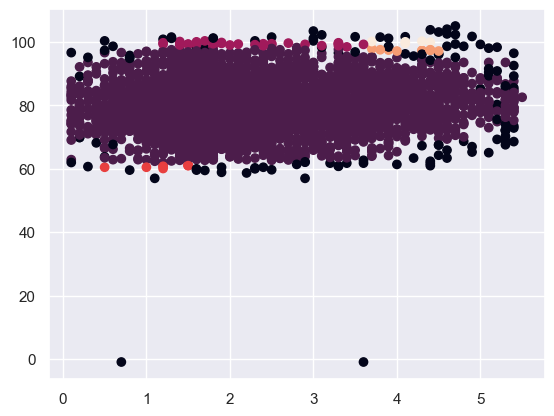

In [17]:
cluster_labels = model.labels_
plt.scatter(df["exercise"], df["lifespan"], c = cluster_labels)

In [18]:
#store the cluster labels in a new column in our data frame:
df['labels'] = cluster_labels 
#remove this values and store the cleaned data in a new variable:
df_cluster_clean = df[df['labels'] != -1]

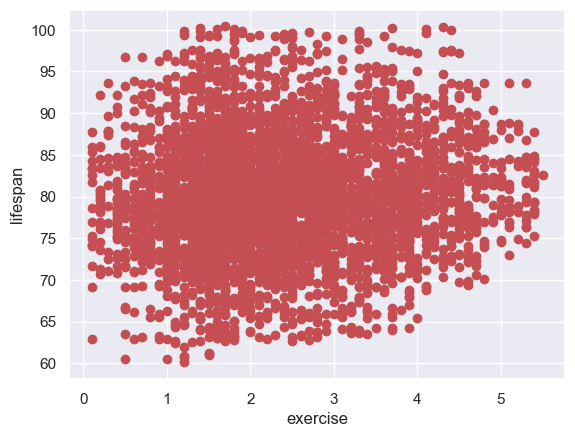

In [19]:
plt.scatter(df_cluster_clean["exercise"], df_cluster_clean["lifespan"], c = 'r')
plt.xlabel('exercise')
plt.ylabel('lifespan')
plt.show()
r_clean = df[df['labels'] != -1]

In [23]:
df_corr = df[['genetic','length', 'mass', 'exercise', 'smoking','alcohol', 'sugar', 'BMI','lifespan']].dropna().corr()
df_corr.style.background_gradient(cmap='RdBu')

,genetic,length,mass,exercise,smoking,alcohol,sugar,BMI,lifespan
genetic,1.000000,-0.030006,0.000654,-0.035257,-0.015208,-0.013323,0.018502,0.010384,0.923706
length,-0.030006,1.000000,-0.000416,0.012258,-0.021369,-0.006838,0.008384,-0.439901,0.017464
mass,0.000654,-0.000416,1.000000,0.007632,-0.009469,0.000895,0.005904,0.887827,-0.063538
exercise,-0.035257,0.012258,0.007632,1.000000,0.021186,-0.024523,-0.008367,0.000955,0.081928
smoking,-0.015208,-0.021369,-0.009469,0.021186,1.000000,-0.012762,0.008103,0.005953,-0.245163
alcohol,-0.013323,-0.006838,0.000895,-0.024523,-0.012762,1.000000,0.004664,0.003223,-0.057211
sugar,0.018502,0.008384,0.005904,-0.008367,0.008103,0.004664,1.000000,0.001761,-0.002425
BMI,0.010384,-0.439901,0.887827,0.000955,0.005953,0.003223,0.001761,1.000000,-0.074751
lifespan,0.923706,0.017464,-0.063538,0.081928,-0.245163,-0.057211,-0.002425,-0.074751,1.000000


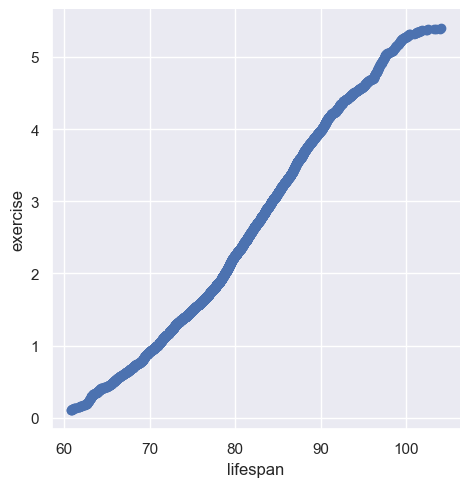

In [28]:
from seaborn_qqplot import pplot

pplot(df, x="lifespan", y="exercise", kind='qq', height=5)